In [ ]:
import numpy as np

In [ ]:
import pandas as pd


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
#Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("To protect the future from climate change Countries must focus on increasing forest area and initiatives to develo"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'To protect the future from climate change Countries must focus on increasing forest area and initiatives to develo']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.000000,To protect the future from climate change Coun...
1,0.500000,This makes it a top priority for the climate m...
2,0.136364,See what environmental issues New York City is...
3,0.125000,Need some ideas for putting climate change int...
4,-0.600000,themadsloth CovidiotDid we learn nothing fromT...


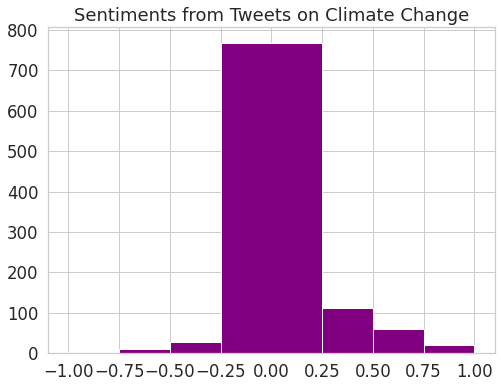

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [ ]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

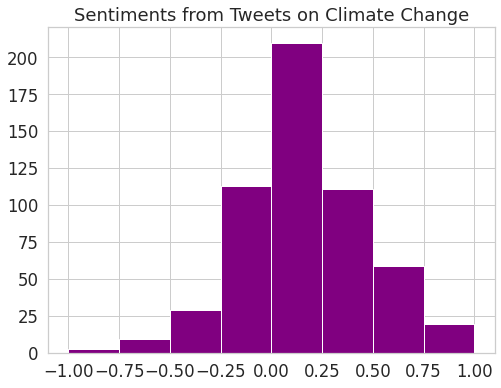

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [ ]:
search_term = "#CampFire -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Whos fired up for the weekend tgif firepit campfire pyromaniac flamethrower torch ritisbbq Bergen Coun"),
 TextBlob("Pistachio Crusted Campfire Lamb Chops campfire"),
 TextBlob("Nursery pm and Reception had so much fun in forest school this afternoonnurserypm reception forestschool"),
 TextBlob("Video review coming soon solostove solostoveranger camping fire campfire stove portable convenient"),
 TextBlob("OOT N ABOOT Dont you dare drain all the bean Tess threatened coffee bogarting hubby")]

In [ ]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
2,0.300000,Nursery pm and Reception had so much fun in fo...
5,0.200000,Getting ready for some Preproduction up at our...
6,-0.250000,Finished For now at least Going to sit with it...
9,-0.083333,Longterm impacts of disasters on water systems...
12,0.600000,Florida nights camp fire music and a nice rum ...


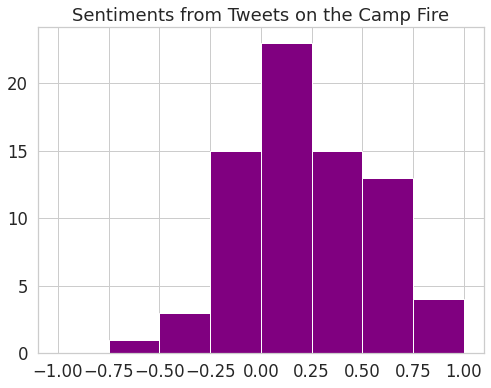

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Camp Fire")
plt.show()